# NBprocessing Package - Showcase

This notebook will present a showcase of all methods under the NBprocessing Package.\
It will use a simple database called `dataset_cars` - you can explore the database in the documentation folder

Created By: Nir Barazida\
Good luck

!pip install NBprocessing==0.0.192

In [1]:
from NBprocessing import NBcategorical
from NBprocessing import NBcontinuous
from NBprocessing import NBplot
from NBprocessing import NBgeneral

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

%matplotlib inline

## Data Dictionary

**name**: Name of the cars

**year**: Year of the car when it was bought

**selling_price**: Price at which the car is being sold

**km_driven**: Number of Kilometres the car is driven

**fuel**: Fuel type of car (petrol / diesel / CNG / LPG / electric)

**seller_type**: Tells if a Seller is Individual or a Dealer

**transmission**: Gear transmission of the car (Automatic/Manual)

**owner**: Number of previous owners of the car.

In [2]:
data = pd.read_csv('dataset_cars.csv')
data.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000.0,25000.0,Petrol,Individual,Manual,First Owner
614,Maruti SX4 Vxi BSIV,2012,225000.0,110000.0,Petrol,Individual,Manual,Second Owner
811,Toyota Innova 2.5 G4 Diesel 8-seater,2007,250000.0,80000.0,Diesel,Individual,Manual,Second Owner
976,Mahindra Thar CRDe,2018,950000.0,20000.0,Diesel,Individual,Manual,First Owner
2044,Mercedes-Benz E-Class 230,1998,1000000.0,35000.0,Petrol,Individual,Automatic,Second Owner


In [3]:
NBgeneral.missing_values(data)

,#Missing_values,%Missing_values
seller_type,314,7.2
fuel,158,3.6
selling_price,136,3.1
km_driven,113,2.6
transmission,78,1.8


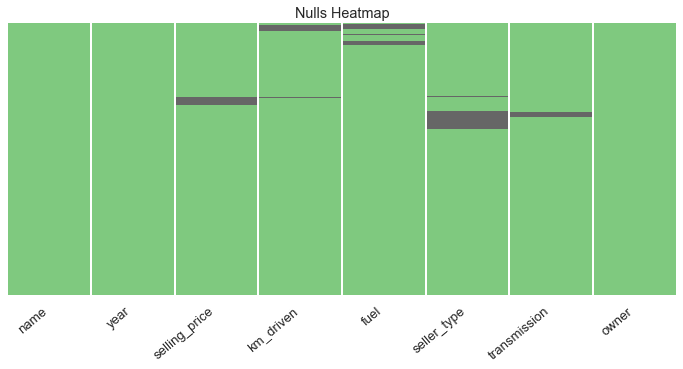

In [4]:
NBplot.plot_missing_value_heatmap(data)

As we can see - almost all columns are full and don't contain missing values.\
However the features `seller_type` is missing a lot of data - almost 10%.\
The rest of the features that are missing data have a low-med amount of missing data.\
However, I will want to check if NaN is maybe marked as `Nane` / `NA` etc, I will do that with value counts **later on** in the missing value section.

In [5]:
data.shape

(4340, 8)

In [6]:
# aplay "format changer" of the describe features for readability
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,year,selling_price,km_driven
count,4340,4204,4227
mean,2013.09,507073,66224.7
std,4.21534,581961,46658.1
min,1992,20000,1
25%,2011,210000,35000
50%,2014,360000,60000
75%,2016,600000,90000
max,2020,8.9e+06,806599


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4340 non-null   object 
 1   year           4340 non-null   int64  
 2   selling_price  4204 non-null   float64
 3   km_driven      4227 non-null   float64
 4   fuel           4182 non-null   object 
 5   seller_type    4026 non-null   object 
 6   transmission   4262 non-null   object 
 7   owner          4340 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 271.4+ KB


In [8]:
#Lets check that all the features have a sufficient amount of data
for feat in data:
    print(f"in feature {feat} the num of unique values is: {data[feat].nunique()}")

in feature name the num of unique values is: 1491
in feature year the num of unique values is: 27
in feature selling_price the num of unique values is: 442
in feature km_driven the num of unique values is: 758
in feature fuel the num of unique values is: 5
in feature seller_type the num of unique values is: 5
in feature transmission the num of unique values is: 2
in feature owner the num of unique values is: 9


In [9]:
NBcategorical.category_ratio(data,['fuel','seller_type','transmission','owner'])

,0,1,2,3,4
fuel,Diesel : 49.47%,Petrol : 49.07%,CNG : 0.88%,LPG : 0.55%,Electric : 0.02%
seller_type,Individual : 73.67%,Dealer : 24.02%,Trustmark Dealer : 2.24%,Indi : 0.05%,Indi. : 0.02%
transmission,Manual : 89.75%,Automatic : 10.25%,0.00,0.00,0.00
owner,First Owner : 65.25%,Second Owner : 25.48%,Third Owner : 7.0%,Fourth Owner : 0.83%,Fifth Owner : 0.58%


Insights:


**statistics:**
- `year` - has a long back tail - the mean is 2013 and median is 2014 however the min is 1992 - 22 years different.\
    we can also see that has 27 different values - increase my assessment for a long tail. 
- `km_driven` - has a high std - almost as the mean value.
- `selling_price` - has a high std - **more** than the mean value. max value is very high - probably outliers

**info:** 
- `owner` - would rather represent it as an int / float because it's describe the number of owners.
- `transmission` - Imbalanced feature - have a category the is ~90% of the data

**unique values:**
- number of unique values  in all columns are as expected



**lets first split the features by type to better understand the data**

![cat](https://media.nature.com/full/nature-assets/ebd/journal/v8/n2/images/6400501f1.gif)

In [10]:
for feat in ['fuel', 'seller_type', 'transmission', 'owner','year']:
    print("\n\n",data[feat].value_counts())



 Diesel      2069
Petrol      2052
CNG           37
LPG           23
Electric       1
Name: fuel, dtype: int64


 Individual          2966
Dealer               967
Trustmark Dealer      90
Indi                   2
Indi.                  1
Name: seller_type, dtype: int64


 Manual       3825
Automatic     437
Name: transmission, dtype: int64


 First Owner       2832
Second Owner      1106
Third Owner        304
Fourth Owner        36
Fifth Owner         25
Test Drive Car      17
Sixth Owner         11
Seventh Owner        6
Eighth Owner         3
Name: owner, dtype: int64


 2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64


- categorical nominal: `name` , `fuel`, `seller_type`, `transmission`,
- categorical ordinal: `year`, `owner`
- numerical discrete:
- numerical continuous: `selling_price` , `km_driven`

**Manipulate the data**

In [11]:
# drop duplicate data
data = data.drop_duplicates()

In [12]:
numeric_col = list(data._get_numeric_data().columns)
non_numeric_col = [col for col in data.columns if col not in numeric_col]

In [13]:
print("numeric_col:\n",numeric_col)
print("\nnon_numeric_col:\n",non_numeric_col)

numeric_col:
 ['year', 'selling_price', 'km_driven']

non_numeric_col:
 ['name', 'fuel', 'seller_type', 'transmission', 'owner']


#### As written above I would rather represent this feature as an int because it's describe the number of owners

In [14]:
data.owner.value_counts()

First Owner       2300
Second Owner       997
Third Owner        290
Fourth Owner        34
Fifth Owner         25
Test Drive Car      17
Sixth Owner         11
Seventh Owner        6
Eighth Owner         3
Name: owner, dtype: int64

**Test Drive Car** will be represented with 0.

In [15]:
data.owner.replace({'Test Drive Car':0,"First Owner": 1,'Second Owner':2,'Third Owner':3,'Fourth Owner':4,
                    'Fifth Owner':5,'Sixth Owner':6,'Seventh Owner':7,'Eighth Owner':8}, inplace=True)
data.owner = data.owner.astype(float)
data.owner.value_counts()

1.0    2300
2.0     997
3.0     290
4.0      34
5.0      25
0.0      17
6.0      11
7.0       6
8.0       3
Name: owner, dtype: int64

#### Lets explore `seller type` feature

In [16]:
data.seller_type.value_counts()

Individual          2639
Dealer               708
Trustmark Dealer      22
Indi                   2
Indi.                  1
Name: seller_type, dtype: int64

As we can see `Individual` is also represented as `Indi` and `Indi.` - I'll represent all values with `Individual`

We can also see that  `Dealer` is represented as `Trustmark Dealer`. - I'll represent those values with `Dealer`

In [17]:
data['seller_type'].replace(['Indi','Indi.'], 'Individual', inplace = True)
data['seller_type'].replace(['Trustmark Dealer'], 'Dealer', inplace = True)

In [18]:
data.seller_type.value_counts()

Individual    2642
Dealer         730
Name: seller_type, dtype: int64

**Plot the features**

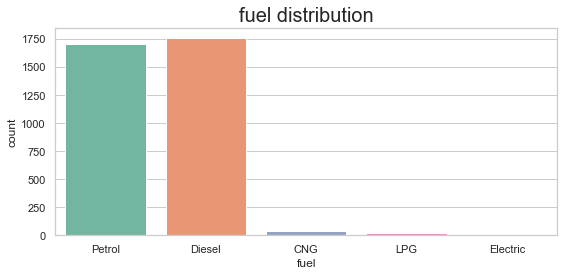

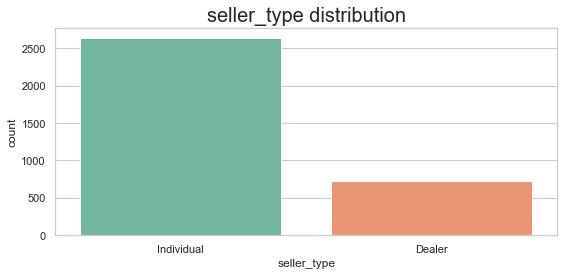

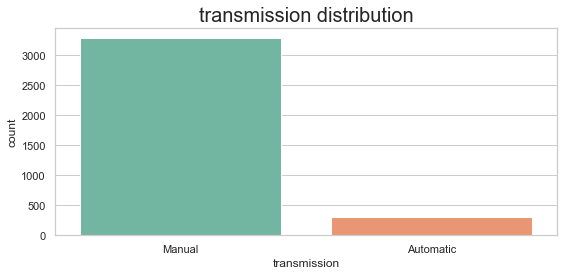

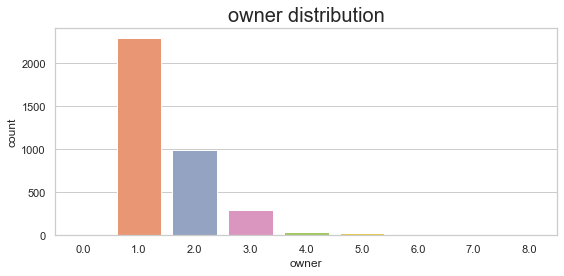

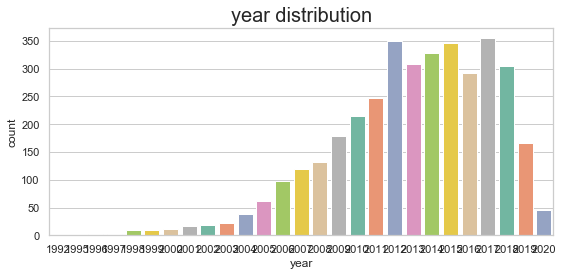

In [19]:
NBplot.count_plot(data,['fuel', 'seller_type', 'transmission', 'owner','year'])

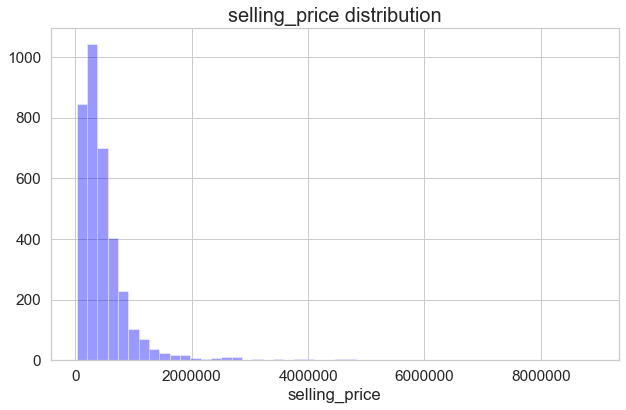

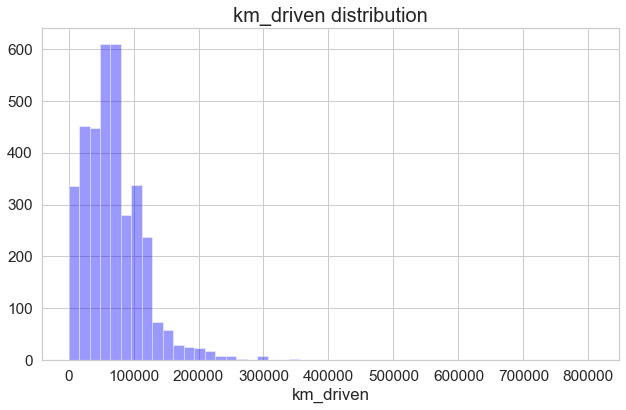

In [20]:
NBplot.distribution_plot(data,['selling_price', 'km_driven'])

Plot Insight:

- distribution plot:

    - `selling price` - has a high concentration around ~250k and then a long head tail gives an exp distribution
    - `Km driven` - has a high concentration around ~80K and then a long head tail gives an exp distribution

- count plot:

    - `year` - has a normal distribution with long back tail - as i predicted above.
    - `owner` - The majority of owners are first/ second and some third. the rest have very little value count.
    - `fuel` - most of the car are using petrol and diesel. need to check for value count on the rest of the features.
    - `seller type` - Is very tilted to the individual.
    - `transmission` - extremely tilted to the manual

**Let check the correlation between the features**

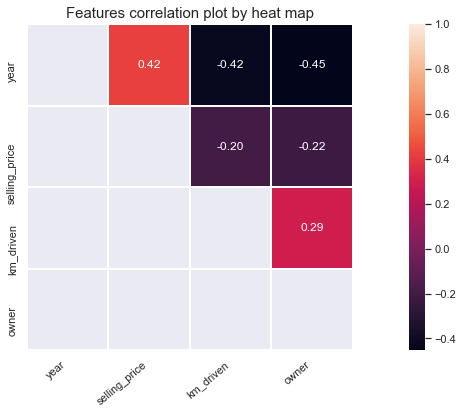

In [21]:
NBplot.plot_corr_heat_map(data)

Insights:

We can see a high negative correlation between:
- `owner` and `year` 
- `Km_driven` and `year`

And a high positive correlation between `selling_price` and `year`

All as expected

**split the data to train and test and process it before creating a model

In [22]:
# split to target an featuers name list
target_list = ['selling_price']
features_list = list(data.columns)
features_list.remove(target_list[0])

In [23]:
# Split data base to train and test sets using sklearn
X_train, X_test, y_train, y_test = train_test_split(data[features_list], data[target_list], test_size=0.20, \
                                                    random_state=42)

START_X_train = len(X_train)

<div class="alert alert-danger"><b>Important</b>
    
I'll concat the feature and target matrix just for the preprocessing.\
when i'm done i'll separate them
</div>

In [24]:
X_train = pd.concat([X_train,y_train], axis=1)
X_test = pd.concat([X_test,y_test], axis=1)

In [25]:
# Integrity checkto the split
print(f"the length of featuers columns in X_train is {len(X_train)}")
print(f"the length of featuers columns in X_test is {len(X_test)}")
print(f"the length of featuers columns in data base is {len(data)}")
print(f"the delta between all is data sets and data base is :",len(data)-len(X_train)-len(X_test))
print("")
print(f"Number of columns in X_train is {len(X_train.columns)}")
print(f"Number of columns in X_test is {len(X_test.columns)}")
print(f"Number of columns in data base is {len(data.columns)}")

the length of featuers columns in X_train is 2946
the length of featuers columns in X_test is 737
the length of featuers columns in data base is 3683
the delta between all is data sets and data base is : 0

Number of columns in X_train is 8
Number of columns in X_test is 8
Number of columns in data base is 8


### Take care of NA values

**Continues features**\
**Train set**

In [26]:
X_train[['selling_price', 'km_driven']].isnull().sum()

selling_price    103
km_driven         86
dtype: int64

In [27]:
X_train[['selling_price','km_driven']].median()

selling_price    350000.0
km_driven         61657.0
dtype: float64

In [28]:
X_train[['selling_price','km_driven']].mean()

selling_price    472880.582835
km_driven         69367.011538
dtype: float64

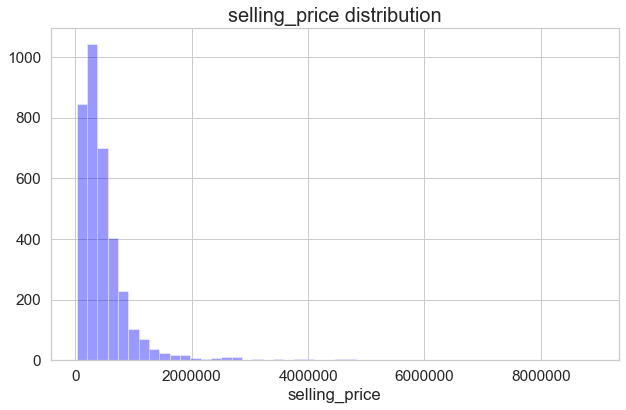

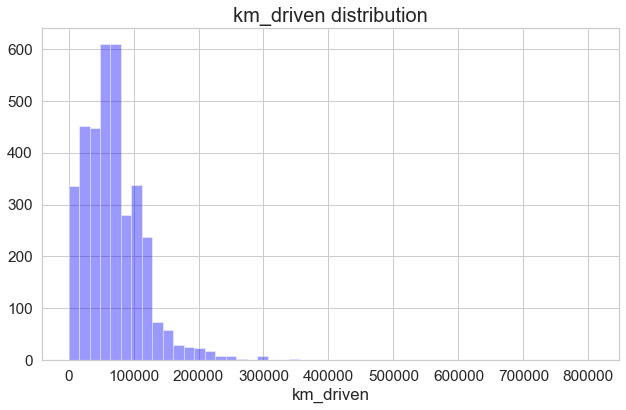

In [29]:
NBplot.distribution_plot(data,['selling_price', 'km_driven'])

we can see that both features with missing values have exp distribution.\
Also the mean is very close to the meadian but a bit higher because of the long head tail.\
Because of the above I'll chose to fill the Na with the median for `Km_driven` and `selling price`.

In [30]:
X_train.selling_price.fillna(X_train.selling_price.median(), inplace=True)
X_train.km_driven.fillna(X_train.km_driven.median(), inplace=True)

In [31]:
X_train[['selling_price', 'km_driven']].isnull().sum()

selling_price    0
km_driven        0
dtype: int64

#### Test set

In [32]:
X_test[['selling_price', 'km_driven']].isnull().sum()

selling_price    33
km_driven        27
dtype: int64

I will fill the `km_driven` and `selling_price` Na values with the median of the **train set** because this is my sample

In [33]:
X_test.selling_price.fillna(X_train.selling_price.median(), inplace=True)
X_test.km_driven.fillna(X_train.km_driven.median(), inplace=True)

In [34]:
X_test[['selling_price', 'km_driven']].isnull().sum()

selling_price    0
km_driven        0
dtype: int64

**Categorical features**\
**Train set**

In [35]:
categorical = non_numeric_col+ ['owner','year' ]

In [36]:
X_train[categorical].isnull().sum()

name              0
fuel            114
seller_type     253
transmission     62
owner             0
owner             0
year              0
dtype: int64

we can see that `fuel`, `seller type` and `transmission` has missing values.\
Lets check the distribution of the categories for every feature

In [37]:
NBcategorical.category_ratio(X_train,['fuel','seller_type','transmission'])

,0,1,2,3,4
fuel,Diesel : 49.75%,Petrol : 48.66%,CNG : 0.88%,LPG : 0.67%,Electric : 0.04%
seller_type,Individual : 78.17%,Dealer : 21.83%,0.00,0.00,0.00
transmission,Manual : 91.23%,Automatic : 8.77%,0.00,0.00,0.00


based on the distribution most of the car are using petrol and diesel.\
I'll fill the missing value by the ratio of the categories to not affect the distribution 

**Ratio of features before filling missing values**

In [38]:
# Not including missing values
pd.DataFrame(X_train['fuel'].value_counts(normalize=True, dropna=True))

,fuel
Diesel,0.497528
Petrol,0.486582
CNG,0.008828
LPG,0.006709
Electric,0.000353


In [39]:
# Including missing values
pd.DataFrame(X_train['fuel'].value_counts(normalize=True, dropna=False))

,fuel
Diesel,0.478276
Petrol,0.467753
NaN,0.038697
CNG,0.008486
LPG,0.006449
Electric,0.000339


In [40]:
# fill missing values be the ratio of current categories
NBcategorical.fill_na_by_ratio(X_train,'fuel')

In [41]:
# Not including missing values
pd.DataFrame(X_train['fuel'].value_counts(normalize=True, dropna=True))

,fuel
Diesel,0.498642
Petrol,0.484386
CNG,0.009504
LPG,0.007128
Electric,0.000339


In [42]:
# Including missing values
pd.DataFrame(X_train['fuel'].value_counts(normalize=True, dropna=False))

,fuel
Diesel,0.498642
Petrol,0.484386
CNG,0.009504
LPG,0.007128
Electric,0.000339


In [43]:
# fill missing values be the ratio of current categories
NBcategorical.fill_na_by_ratio(X_train,'seller_type')
NBcategorical.fill_na_by_ratio(X_train,'transmission')

In [44]:
# Check that there is no missing values
display(pd.DataFrame(X_train['seller_type'].value_counts(normalize=True, dropna=False)))
display(pd.DataFrame(X_train['transmission'].value_counts(normalize=True, dropna=False)))

,seller_type
Individual,0.78072
Dealer,0.21928


,transmission
Manual,0.912424
Automatic,0.087576


In [45]:
X_train[categorical].isnull().sum()

name            0
fuel            0
seller_type     0
transmission    0
owner           0
owner           0
year            0
dtype: int64

# needs to change the fill_na_by_ratio method.
will recive two dataframe - (train, columnname,test=None)\
if test:

     fill na in tset by train

else:

    fill na in train by train

### Take care of outliers
**Continues features**\
**Train set**

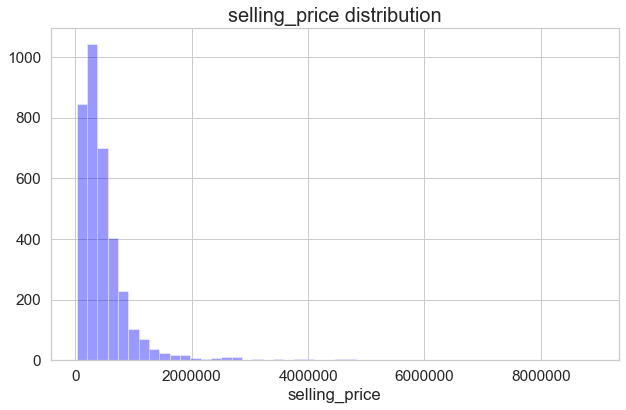

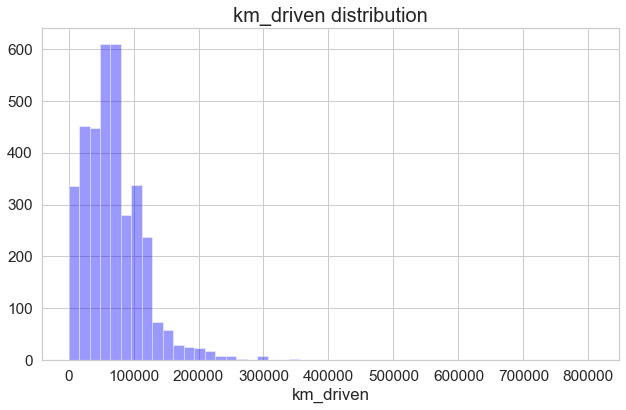

In [46]:
NBplot.distribution_plot(data,['selling_price', 'km_driven'])

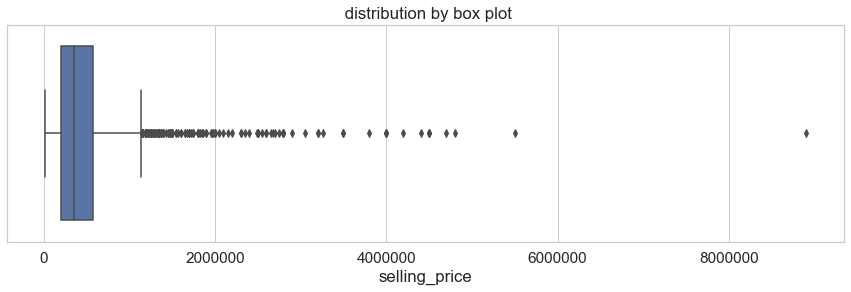

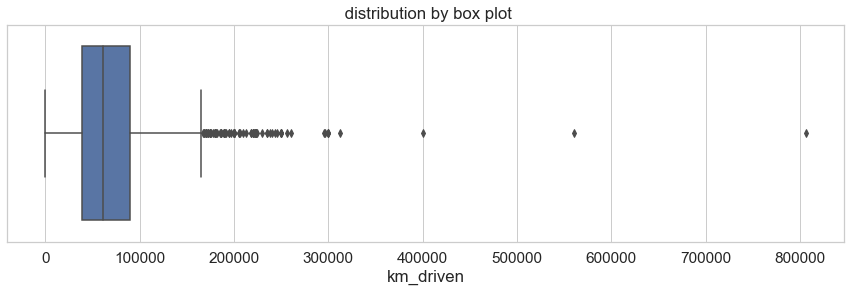

In [47]:
for col in ['selling_price','km_driven']:
    plt.figure(figsize=(15,4))
    g = sns.boxplot(x=X_train[col])
    g.set(title=" distribution by box plot")
    plt.show()

Insights from the plot above:
- `selling price` - has 2 points after 8M
- `km driven` - has 2 points after 400K

### The "Hammer" method
#### remove outliers by trim head and tail based on std
3 times of standard deviation as my main data and out of this range would be the outlier.\
Normal distribution would guarantee that the main data have about 99.73% of information.
not all data has Normal distribution thus will use it carefully - especially on bottom border and will drop only 3+ std

![Image of Yaktocat](https://i.stack.imgur.com/AxYue.png)

In [48]:
for col in ['selling_price','km_driven']:
    print(f"\nfor feature {col}")
    NBcontinuous.remove_outliers_by_boundaries(X_train,col,0.001, 0.995)


for feature selling_price
Do you wish to drop 18 rows (0.61% of the database)? [y/n]y

for feature km_driven
Do you wish to drop 16 rows (0.55% of the database)? [y/n]y


### The "Tweezers" method

Will plot the box distribution of every feature and will hand-pick the boundaries for every feature.\
Will do it for top and bottom boundaries

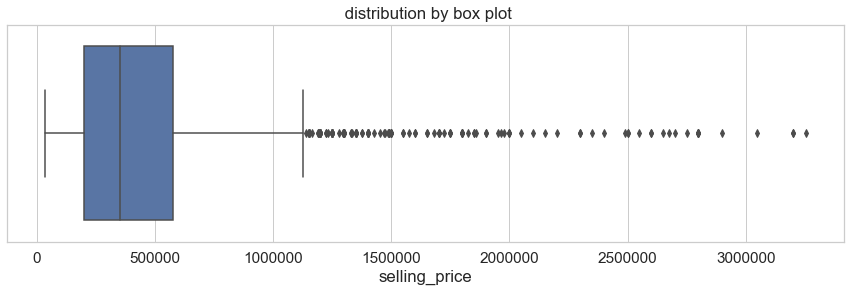

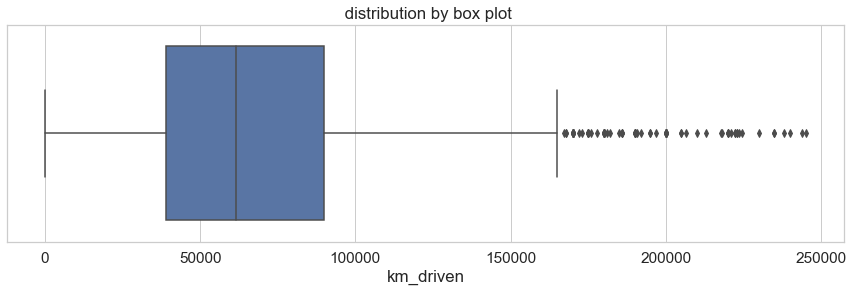

In [49]:
for col in ['selling_price','km_driven']:
    plt.figure(figsize=(15,4))
    g = sns.boxplot(x=X_train[col])
    g.set(title=" distribution by box plot")
    plt.show()

In [50]:
filter_dict_up = {
    "selling_price": 3000000,
    "km_driven": 240000
}

# Doesn't make sense to use a bottom boundary - will do it to just to show the useage
filter_dict_down = {    
    "selling_price": 25000,
    "km_driven": 25000
}

In [51]:
# check how many outliers we have for every boundary and make the adjustment
NBcontinuous.get_num_outliers_by_value(X_train,filter_dict_up,filter_dict_down)


Outliers above:
selling_price: 4
km_driven: 2

Outliers under:
selling_price: 0
km_driven: 395
\nBy removing all 401 rows we will lose 13.77 % of the data


In [52]:
filter_dict_up = {
    "selling_price": 3000000
}

# Doesn't make sense to use a bottom boundary - will do it to just to show the useage
filter_dict_down = {    
}

In [53]:
# let's check again
NBcontinuous.get_num_outliers_by_value(X_train,filter_dict_up)


Outliers above:
selling_price: 4
\nBy removing all 4 rows we will lose 0.14 % of the data


In [54]:
# drop the outlires
NBcontinuous.remove_outliers_by_value(X_train,filter_dict_up)

\nShape before removing outliers: (2912, 8)
\nshape after removing outliers: (2908, 8)
\nDroped 4 rows that are 0.14 % of the database


**categorical features**\
**Train set**

In [55]:
for col in ['fuel', 'seller_type', 'transmission', 'owner','year']:
    print("\n\n",X_train[col].value_counts())



 Diesel      1440
Petrol      1418
CNG           28
LPG           21
Electric       1
Name: fuel, dtype: int64


 Individual    2275
Dealer         633
Name: seller_type, dtype: int64


 Manual       2669
Automatic     239
Name: transmission, dtype: int64


 1.0    1809
2.0     798
3.0     231
4.0      21
5.0      20
0.0      15
6.0       8
7.0       4
8.0       2
Name: owner, dtype: int64


 2017    290
2012    279
2015    269
2014    266
2013    249
2018    231
2016    219
2011    204
2010    174
2009    135
2019    125
2008    112
2007     96
2006     79
2005     44
2020     34
2004     29
2003     16
2002     14
2001     11
1999      9
2000      9
1998      9
1997      3
1995      1
1992      1
Name: year, dtype: int64


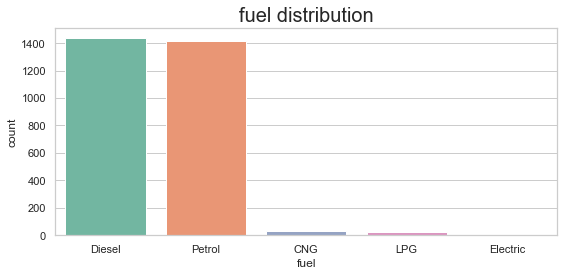

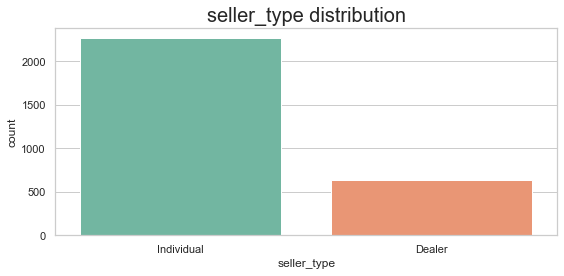

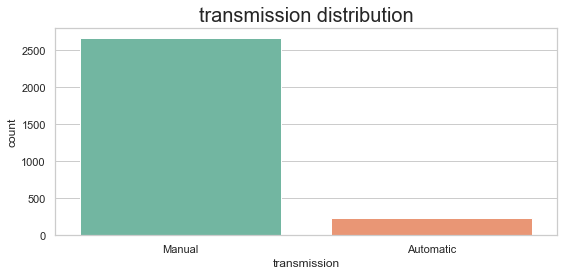

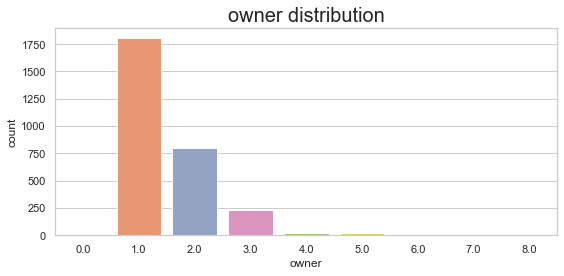

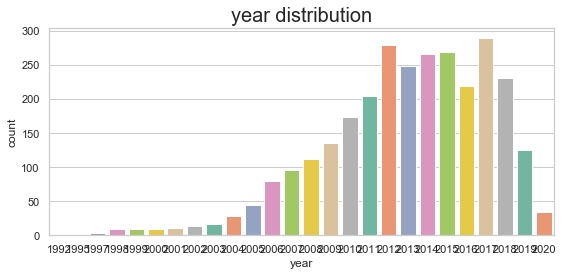

In [56]:
NBplot.count_plot(X_train,['fuel', 'seller_type', 'transmission', 'owner','year'])

I'll check for all features that contains less than 1% of the data and combine them under 'other'

In [57]:
X_train["fuel"].value_counts(normalize=True)

Diesel      0.495186
Petrol      0.487620
CNG         0.009629
LPG         0.007221
Electric    0.000344
Name: fuel, dtype: float64

- We can see that `CNG` `LPG` , `Electric` will be combined
- We will save the name of categories that were combined in the `combined_values_fuel` list so that we will be able to conduct the same action on the test data set.

In [58]:
combined_values_fuel = NBcategorical.combine_categories(X_train, 'fuel',category_name='other' )

In [59]:
# let's check the results
X_train["fuel"].value_counts(normalize=True)

Diesel    0.495186
Petrol    0.487620
other     0.017194
Name: fuel, dtype: float64

As we can see `CNG` `LPG` , `Electric` were combined under `other`

In [60]:
X_train["owner"].value_counts(normalize=True)

1.0    0.622077
2.0    0.274415
3.0    0.079436
4.0    0.007221
5.0    0.006878
0.0    0.005158
6.0    0.002751
7.0    0.001376
8.0    0.000688
Name: owner, dtype: float64

In [61]:
combined_values_owner = NBcategorical.combine_categories(X_train, 'owner',category_name=0 )

In [62]:
X_train["owner"].value_counts(normalize=True)

1.0    0.622077
2.0    0.274415
3.0    0.079436
0.0    0.024072
Name: owner, dtype: float64

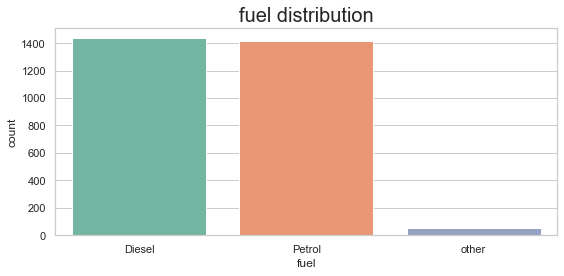

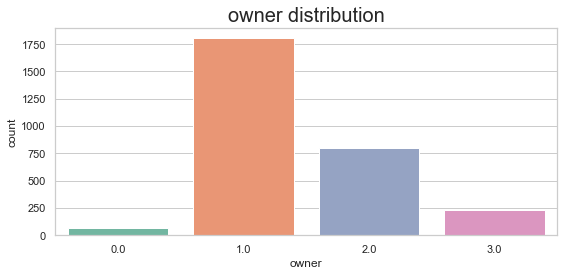

In [63]:
NBplot.count_plot(X_train,['fuel','owner'])

### Test set
to create the same changes on the test set i will need to:
1. gather all features from `fuel` to "others" `owner` to 0 as i did to the train set.
2. Make sure that I don't have any new categories in X_test.fuel that do not exist in X_train.fuel

In [64]:
X_test2 = X_test.copy()

In [65]:
X_test2["fuel"].replace(combined_values_fuel, "other", inplace=True)

In [66]:
X_test2["owner"].replace(combined_values_owner, 0, inplace=True)

In [67]:
NBcategorical.categories_not_in_common(X_train,X_test2,'fuel')

values existing only in the first data-set {nan}
values existing only in the second data-set set()


In [68]:
NBcategorical.categories_not_in_common(X_train,X_test2,'owner')

values existing only in the first data-set set()
values existing only in the second data-set set()


# Extra Features in package

### Remove category in feature 

In [69]:
data.fuel.value_counts()

Diesel      1762
Petrol      1705
CNG           35
LPG           22
Electric       1
Name: fuel, dtype: int64

We can see that `Electric` have minor effect on the model and will be impossible to predict it.\
Lets drop this option from the database

In [70]:
NBcategorical.remove_categories(data,'fuel',['Electric'])

Using remove_categories will result in deletion of 1\nWhich is 0.03 % of the database.\nDo you wish to continue? [y/n]y
the new database shape is(3682, 8)


### Fill missing values in data-time column 
to do so lets load a database that contains a date-time column

In [71]:
listinf_df = pd.DataFrame(pd.read_csv('listings.csv')['host_since'])

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [72]:
listinf_df.sample(3)

,host_since
16615,2018-08-06
3690,2014-06-25
10496,2014-06-15


In [73]:
listinf_df.host_since.isnull().sum()

14

In [74]:
listinf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19619 entries, 0 to 19618
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   host_since  19605 non-null  object
dtypes: object(1)
memory usage: 153.4+ KB


As we can see the feature is an object type and not Date-Time.\
Lets change the type of the feature and than use the fill_na_timedate method

In [75]:
listinf_df['host_since'] = pd.to_datetime(listinf_df['host_since'])

In [76]:
NBcontinuous.fill_na_timedate(listinf_df,'host_since')

In [77]:
listinf_df.host_since.isnull().sum()

0